In [1]:
# quick analysis of WallstreetBets redit comments

In [2]:
# loading in all the essentials
import pandas as pd
import numpy as np 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

/Users/avinashgohite/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# reading in the dataset
df = pd.read_csv('reddit_wsb.csv')
df.dtypes

title         object
score          int64
id            object
url           object
comms_num      int64
created      float64
body          object
timestamp     object
dtype: object

In [65]:
import sys
print(sys.executable)


/Users/avinashgohite/opt/anaconda3/bin/python


In [66]:
!{sys.executable} -m pip install emoji


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 713.5 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0


In [68]:
!{sys.executable} -m pip install --upgrade typing_extensions


In [69]:
import emoji
print(emoji.emojize("Python is fun :thumbs_up:"))


ImportError: cannot import name 'Match' from 'typing_extensions' (/Users/avinashgohite/opt/anaconda3/lib/python3.9/site-packages/typing_extensions.py)

In [4]:
#check the info column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53187 entries, 0 to 53186
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      53187 non-null  object 
 1   score      53187 non-null  int64  
 2   id         53187 non-null  object 
 3   url        53187 non-null  object 
 4   comms_num  53187 non-null  int64  
 5   created    53187 non-null  float64
 6   body       24738 non-null  object 
 7   timestamp  53187 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.2+ MB


In [5]:
#create a timestamp
df.timestamp = pd.to_datetime(df.timestamp)

In [6]:
#create a day, hour, dayofweek column and check the head of the data
df['day'] =df['timestamp'].dt.date
df['day'] =pd.to_datetime(df['day'])
df['hour'] = df.timestamp.dt.hour
df['dayofweek'] =df.timestamp.dt.day_name()
df.head()

,title,score,id,url,comms_num,created,body,timestamp,day,hour,dayofweek
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41,2021-01-28,21,Thursday
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10,2021-01-28,21,Thursday
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,2021-01-28,21,Thursday
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57,2021-01-28,21,Thursday
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56,2021-01-28,21,Thursday


In [7]:
#create a new data frame that isolate only march check the amount of comments
df2 = df[df['timestamp']>='2021-02-01']
print(df.shape)
print(df2.shape)

(53187, 11)
(33932, 11)


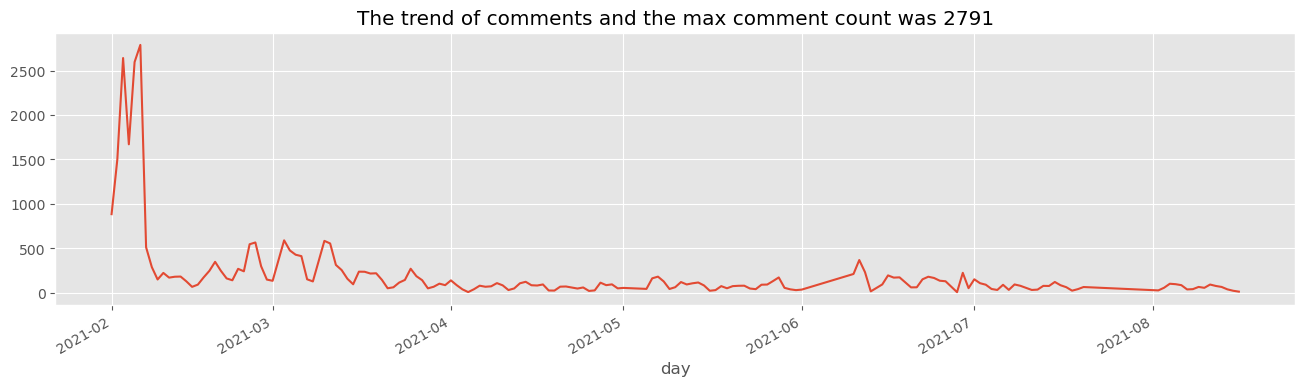

In [8]:
plt.style.use('ggplot')
df2.groupby('day')['title'].count().plot(figsize=(16,4))
plt.title("The trend of comments and the max comment count was " + str(df2.groupby('day')['title'].count().max()));

In [10]:
import nltk

# Ensure 'punkt' is downloaded
nltk.download('punkt')

from nltk.tokenize import word_tokenize

text = "Hello, world! This is a test sentence."
tokens = word_tokenize(text)
print(tokens)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/avinashgohite/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Hello', ',', 'world', '!', 'This', 'is', 'a', 'test', 'sentence', '.']


In [11]:
# let joins all the title rows and tokenize them into words
comments =" ".join(df['title'])
words =word_tokenize(comments)

In [12]:
#what are the five top days for comments
df2.groupby('day',as_index=False)['title'].count().sort_values(by='title',ascending=False).head()

,day,title
5,2021-02-06,2791
2,2021-02-03,2643
4,2021-02-05,2598
3,2021-02-04,1671
1,2021-02-02,1502


In [13]:
comments


'It\'s not about the money, it\'s about sending a message. 🚀💎🙌 Math Professor Scott Steiner says the numbers spell DISASTER for Gamestop shorts Exit the system NEW SEC FILING FOR GME! CAN SOMEONE LESS RETARDED THAN ME PLEASE INTERPRET? Not to distract from GME, just thought our AMC brothers should be aware of this WE BREAKING THROUGH SHORT STOCK DOESN\'T HAVE AN EXPIRATION DATE THIS IS THE MOMENT Currently Holding AMC and NOK - Is it retarded that I think I should move it all to GME today? I have nothing to say but BRUH I am speechless TO THE MOON 🚀🚀🚀💎💎👋👋 We need to keep this movement going, we all can make history! GME Premarket 🍁 Musk approved 🎮🛑💎✋ Once you\'re done with GME - $AG and $SLV, the gentleman\'s short squeeze, driven by macro fundamentals $GME price has nothing to do with fundamentals and everything to do with financial economics I Love You Retards!!!! 420 wasn’t a meme. GME 🚀 🚀 🚀 To The Mass Relays & Beyond I come back to you now... At the turn of the tide. 9 words broug

In [15]:
words

['It',
 "'s",
 'not',
 'about',
 'the',
 'money',
 ',',
 'it',
 "'s",
 'about',
 'sending',
 'a',
 'message',
 '.',
 '🚀💎🙌',
 'Math',
 'Professor',
 'Scott',
 'Steiner',
 'says',
 'the',
 'numbers',
 'spell',
 'DISASTER',
 'for',
 'Gamestop',
 'shorts',
 'Exit',
 'the',
 'system',
 'NEW',
 'SEC',
 'FILING',
 'FOR',
 'GME',
 '!',
 'CAN',
 'SOMEONE',
 'LESS',
 'RETARDED',
 'THAN',
 'ME',
 'PLEASE',
 'INTERPRET',
 '?',
 'Not',
 'to',
 'distract',
 'from',
 'GME',
 ',',
 'just',
 'thought',
 'our',
 'AMC',
 'brothers',
 'should',
 'be',
 'aware',
 'of',
 'this',
 'WE',
 'BREAKING',
 'THROUGH',
 'SHORT',
 'STOCK',
 'DOES',
 "N'T",
 'HAVE',
 'AN',
 'EXPIRATION',
 'DATE',
 'THIS',
 'IS',
 'THE',
 'MOMENT',
 'Currently',
 'Holding',
 'AMC',
 'and',
 'NOK',
 '-',
 'Is',
 'it',
 'retarded',
 'that',
 'I',
 'think',
 'I',
 'should',
 'move',
 'it',
 'all',
 'to',
 'GME',
 'today',
 '?',
 'I',
 'have',
 'nothing',
 'to',
 'say',
 'but',
 'BRUH',
 'I',
 'am',
 'speechless',
 'TO',
 'THE',
 'MOON',
 

In [23]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/avinashgohite/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/avinashgohite/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/avinashgohite/nltk_data...


True

In [27]:
#lets creat a small function to clean the words of punctuations, stop words and lemmatize the words
def clean_words(new_tokens):
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    return new_tokens

In [28]:
lowered = clean_words(words)

In [29]:
bow = Counter(lowered)

In [30]:
bow

Counter({'money': 1082,
         'sending': 27,
         'message': 126,
         'math': 35,
         'professor': 7,
         'scott': 8,
         'steiner': 1,
         'say': 511,
         'number': 174,
         'spell': 8,
         'disaster': 10,
         'gamestop': 856,
         'short': 1894,
         'exit': 43,
         'system': 76,
         'new': 890,
         'sec': 400,
         'filing': 44,
         'gme': 8738,
         'someone': 298,
         'le': 118,
         'retarded': 291,
         'please': 526,
         'interpret': 2,
         'distract': 8,
         'thought': 355,
         'amc': 3492,
         'brother': 206,
         'aware': 19,
         'breaking': 75,
         'stock': 3106,
         'expiration': 36,
         'date': 89,
         'moment': 100,
         'currently': 104,
         'holding': 2178,
         'nok': 1111,
         'think': 694,
         'move': 413,
         'today': 1481,
         'nothing': 200,
         'bruh': 15,
         'speech

In [31]:
data = pd.DataFrame(bow.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

In [32]:
data =data.head(20)

In [33]:
data

,word,frequency
18,gme,8738
107,buy,4162
26,amc,3492
118,hold,3315
234,robinhood,3213
30,stock,3106
441,share,2212
35,holding,2178
857,yolo,2170
174,still,2019


<AxesSubplot:xlabel='frequency', ylabel='word'>

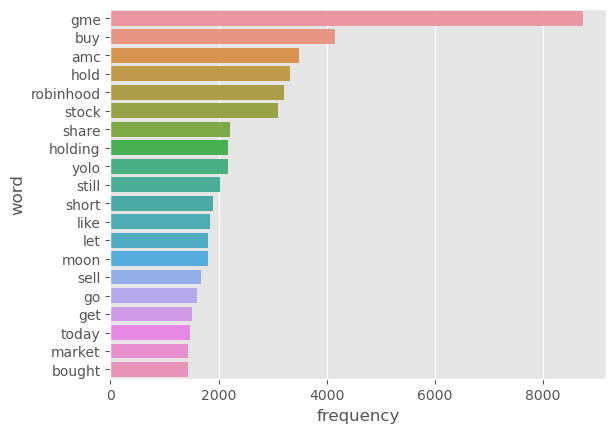

In [34]:
sns.barplot(x='frequency',y='word',data=data)

In [35]:
bow2 =Counter(ngrams(lowered,2))

In [36]:
bow2

Counter({('money', 'sending'): 4,
         ('sending', 'message'): 9,
         ('message', 'math'): 1,
         ('math', 'professor'): 1,
         ('professor', 'scott'): 1,
         ('scott', 'steiner'): 1,
         ('steiner', 'say'): 1,
         ('say', 'number'): 1,
         ('number', 'spell'): 1,
         ('spell', 'disaster'): 1,
         ('disaster', 'gamestop'): 1,
         ('gamestop', 'short'): 12,
         ('short', 'exit'): 2,
         ('exit', 'system'): 1,
         ('system', 'new'): 2,
         ('new', 'sec'): 3,
         ('sec', 'filing'): 10,
         ('filing', 'gme'): 2,
         ('gme', 'someone'): 11,
         ('someone', 'le'): 1,
         ('le', 'retarded'): 6,
         ('retarded', 'please'): 2,
         ('please', 'interpret'): 1,
         ('interpret', 'distract'): 1,
         ('distract', 'gme'): 4,
         ('gme', 'thought'): 10,
         ('thought', 'amc'): 4,
         ('amc', 'brother'): 3,
         ('brother', 'aware'): 1,
         ('aware', 'breaking')

In [52]:
def word_frequency(sentence):
    sentence =" ".join(sentence)
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    counted = Counter(new_tokens)
    counted_2= Counter(ngrams(new_tokens,2))
    counted_3= Counter(ngrams(new_tokens,3))
    word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
    trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
    return word_freq,word_pairs,trigrams
    

In [56]:
data2,data3,data4 = word_frequency(df['title'])

In [57]:
data4

,trigrams,frequency
92,"(daily, discussion, thread)",181
3994,"(hold, hold, hold)",147
2157,"(buy, buy, buy)",118
3415,"(gme, amc, bb)",91
1100,"(class, action, lawsuit)",77
...,...,...
101118,"(first, stock, saw)",1
101119,"(stock, saw, joined)",1
101120,"(saw, joined, fud)",1
101121,"(joined, fud, hold)",1


<AxesSubplot:xlabel='frequency', ylabel='trigrams'>

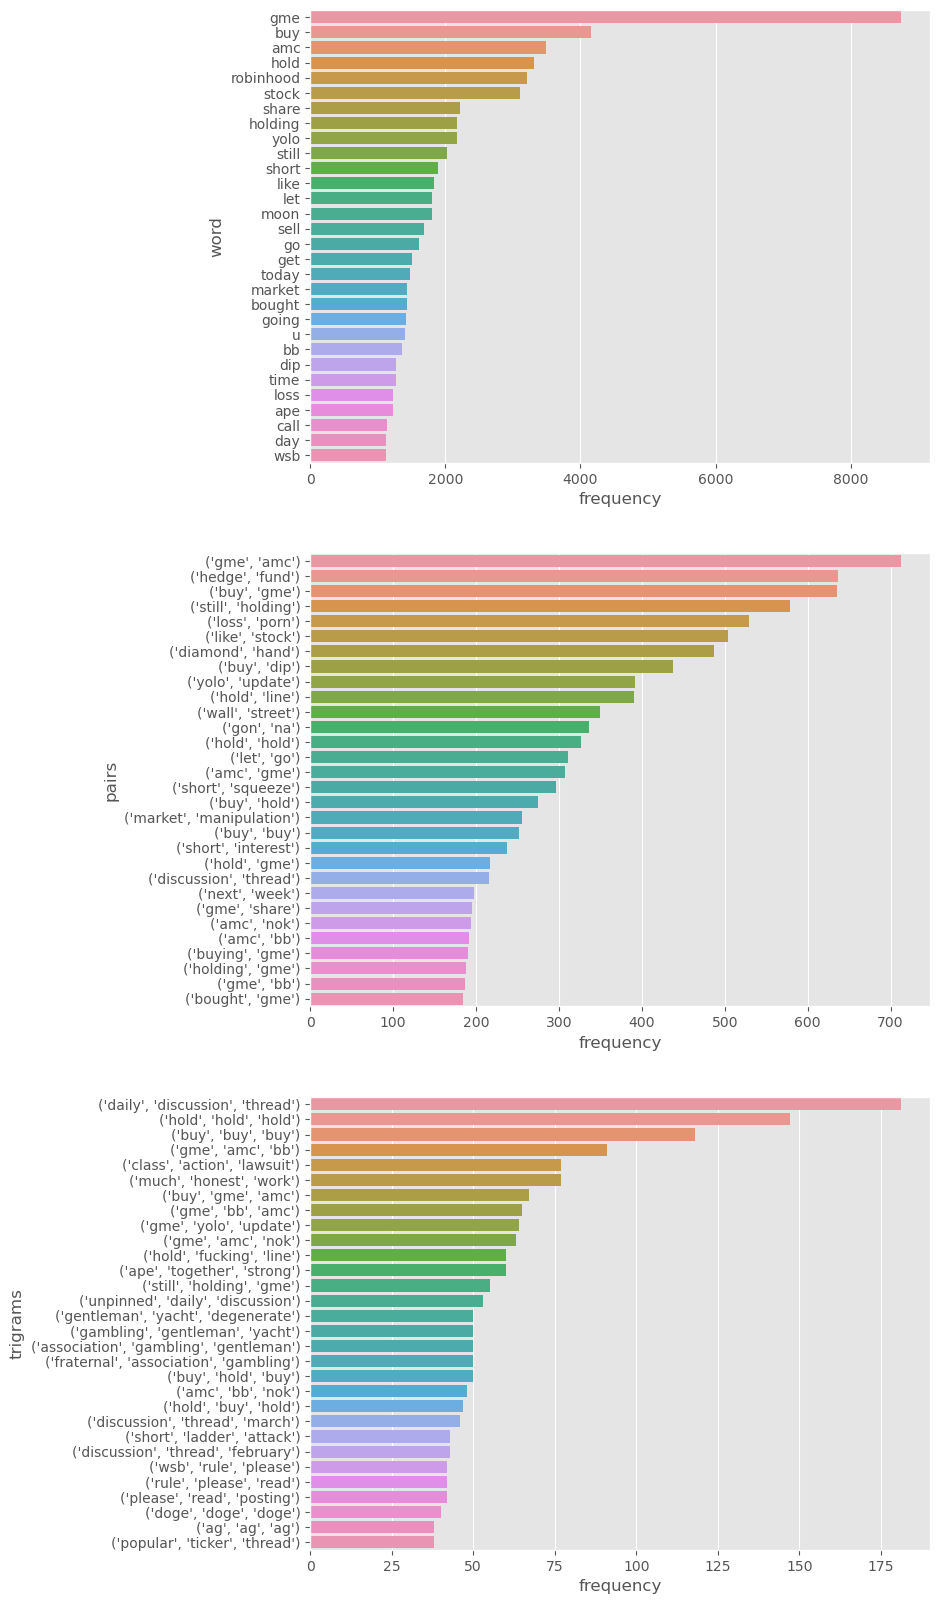

In [58]:
fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=data2.head(30))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=data3.head(30))
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=data4.head(30))